# Modeling and Evaluation - Predict House Price

## Objectives

* Fit and evaluate a classification model to predict a house sale price when the house features are known.

## Inputs
* outputs/datasets/collection/housing_data_cleaned.csv
* Feature engineering/data cleaning from the feature engineering notebook.

## Outputs 
* Train set
* Test set
* ML pipeline to predict house sale prices



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT'

# Load Data

In [4]:
import pandas as pd
import numpy as np
df = (pd.read_csv("outputs/datasets/collection/housing_data_cleaned.csv"))
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.0,1,706.0,6.0,150.0,548.0,2.0,2003.0,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500.0
1,1262.0,0.0,3.0,4,978.0,5.0,284.0,460.0,2.0,1976.0,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500.0
2,920.0,866.0,3.0,2,486.0,6.0,434.0,608.0,2.0,2001.0,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500.0
3,961.0,0.0,3.0,1,216.0,5.0,540.0,642.0,1.0,1998.0,...,9550.0,60.0,0.0,35.0,5,7,756.0,1915,1970,140000.0
4,1145.0,0.0,4.0,3,655.0,6.0,490.0,836.0,2.0,2000.0,...,14260.0,84.0,350.0,84.0,5,8,1145.0,2000,2000,250000.0


## Create ML Pipeline

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   float64
 1   2ndFlrSF      1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
 3   BsmtExposure  1460 non-null   int64  
 4   BsmtFinSF1    1460 non-null   float64
 5   BsmtFinType1  1460 non-null   float64
 6   BsmtUnfSF     1460 non-null   float64
 7   GarageArea    1460 non-null   float64
 8   GarageFinish  1460 non-null   float64
 9   GarageYrBlt   1460 non-null   float64
 10  GrLivArea     1460 non-null   float64
 11  KitchenQual   1460 non-null   int64  
 12  LotArea       1460 non-null   float64
 13  LotFrontage   1460 non-null   float64
 14  MasVnrArea    1460 non-null   float64
 15  OpenPorchSF   1460 non-null   float64
 16  OverallCond   1460 non-null   int64  
 17  OverallQual   1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

- **Import all necassary ML algorithms**

### Bring in the pipeline from the feature engineering notebook with feature scaling, feature selection and model added:

In [6]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# ML algorithms 
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

def PipelineOptimization(dic, numeric_vars, model):
    
      pipeline = Pipeline([       
            # ('drop_features', DropFeatures(features_to_drop = ['EnclosedPorch', 'WoodDeckSF'])),
     
            # ('custom_encoder', MyCustomEncoder(variables=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dic=dic)),
            
            ('median_imputer',  MeanMedianImputer(imputation_method='median', variables=numeric_vars)),
            
            ('corr_sel', SmartCorrelatedSelection(method="spearman", threshold=0.6, selection_method="variance")),
            
            ("feat_scaling", StandardScaler() ),

            ("feat_selection",  SelectFromModel(model) ),

            ("model", model ),
      ])

      return pipeline


In [7]:
print(df.isna().sum())

features_to_drop = ['EnclosedPorch', 'WoodDeckSF']

print("Features being dropped:", features_to_drop)

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64
Features being dropped: ['EnclosedPorch', 'WoodDeckSF']


- **Hyperparameter optimization**: Custom hyperparameter optimization to fit my model

In [8]:
from sklearn.model_selection import GridSearchCV

class HyperparameterOptimizationSearch:

    def __init__(self, dic, numeric_vars, models, params):
        self.dic = dic
        self.numeric_vars = numeric_vars
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model=  PipelineOptimization(dic, numeric_vars, self.models[key],)

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(np.array(r).reshape(-1, 1))


            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches
        

In [9]:
print(df.isna().sum())

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


## Split the data into Train and Test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.2,
    random_state=0,
)

print('Train Set:', X_train.shape, y_train.shape, 'Test Set:', X_test.shape, y_test.shape)

Train Set: (1168, 21) (1168,) Test Set: (292, 21) (292,)


In [11]:
print(df.isna().sum())

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


In [12]:
print(X_train[['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']].dtypes)


BsmtExposure      int64
BsmtFinType1    float64
GarageFinish    float64
KitchenQual       int64
dtype: object


## Grid Search CV from Scikit Learn

Lets try 7 ML models to find the best one

In [13]:
models_quick_search = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
}

params_quick_search = {
    "LinearRegression": {},
    "DecisionTreeRegressor": {},
    "RandomForestRegressor": {},
    "ExtraTreesRegressor": {},
    "AdaBoostRegressor": {},
    "GradientBoostingRegressor": {},
    "XGBRegressor": {},
}

In [14]:
dic = {'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}, 'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}, 'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}, 'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}}
numeric_vars = ['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea']     


# Train 5 models, 1 for each of 5 cross validations for each algorithm and the hyperparameters

In [15]:
search = HyperparameterOptimizationSearch(dic=dic, numeric_vars=numeric_vars, models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/workspace/.pip-modules/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/workspace/.pip-modules/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/workspace/.pip-modules/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/workspace/.pip-modules/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/workspace/.pip-modules/lib/python3.12/site-packages/xgboost/data.py:440: FutureWarning: is_

## Lets check the results

In [16]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score
3,ExtraTreesRegressor,0.672712,0.803012,0.874444,0.075183
2,RandomForestRegressor,0.632989,0.791839,0.85964,0.083685
0,LinearRegression,0.701462,0.77925,0.824712,0.041363
5,GradientBoostingRegressor,0.614845,0.759047,0.850056,0.091379
6,XGBRegressor,0.637822,0.739428,0.827152,0.071499
4,AdaBoostRegressor,0.621051,0.71584,0.775451,0.058374
1,DecisionTreeRegressor,0.495511,0.6203,0.674645,0.068149


## Use hyperparameter optimization on the top 4 models using hyperparameter combinations

In [17]:
models_search = {
    "LinearRegression": LinearRegression(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
}

params_search = {
    "LinearRegression":{},
    "GradientBoostingRegressor":{'model__n_estimators': [100,50,140],
                                 'model__learning_rate':[0.1, 0.01, 0.001],
                                 'model__max_depth': [3,15, None],
                                 'model__min_samples_split': [2,50],
                                 'model__min_samples_leaf': [1,50],
                                 'model__max_leaf_nodes': [None,50],
    },
    "ExtraTreesRegressor":{'model__n_estimators': [100,50,150],
                           'model__max_depth': [None, 3, 15],
                           'model__min_samples_split': [2, 50],
                           'model__min_samples_leaf': [1,50],
    },
    "RandomForestRegressor":{'model__n_estimators': [100,50, 140],
                             'model__max_depth': [None,4, 15],
                             'model__min_samples_split': [2,50],
                             'model__min_samples_leaf': [1,50],
                             'model__max_leaf_nodes': [None,50],
    },
}

## Train our models with Grid Search CV

* Totalling 1625 models

In [18]:
search = HyperparameterOptimizationSearch(dic=dic, numeric_vars=numeric_vars, models=models_search, params=params_search)

search.fit(X_train, y_train, scoring= 'r2', n_jobs=1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 72 candidates, totalling 360 fits


## Lets check the results

In [19]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary.head(35)

,estimator,min_score,mean_score,max_score,std_score,model__learning_rate,model__max_depth,model__max_leaf_nodes,model__min_samples_leaf,model__min_samples_split,model__n_estimators
243,ExtraTreesRegressor,0.666918,0.807807,0.877314,0.077076,NaN,15,NaN,1,2,150
222,ExtraTreesRegressor,0.754286,0.806116,0.855046,0.043113,NaN,None,NaN,1,50,150
246,ExtraTreesRegressor,0.754286,0.8061,0.855059,0.043107,NaN,15,NaN,1,50,150
244,ExtraTreesRegressor,0.75347,0.806001,0.853251,0.04265,NaN,15,NaN,1,50,100
220,ExtraTreesRegressor,0.75347,0.805992,0.85321,0.042641,NaN,None,NaN,1,50,100
241,ExtraTreesRegressor,0.660607,0.805339,0.877521,0.078662,NaN,15,NaN,1,2,100
221,ExtraTreesRegressor,0.752416,0.804181,0.849446,0.042717,NaN,None,NaN,1,50,50
245,ExtraTreesRegressor,0.752416,0.804181,0.849446,0.042717,NaN,15,NaN,1,50,50
219,ExtraTreesRegressor,0.673539,0.803392,0.874046,0.074514,NaN,None,NaN,1,2,150
217,ExtraTreesRegressor,0.672712,0.803012,0.874444,0.075183,NaN,None,NaN,1,2,100


### Now we will look into all 4 algorithms

## 1. ExtraTreesRegressor

In [20]:
best_model = grid_search_summary.iloc[0,0]
best_model

'ExtraTreesRegressor'

* Best model parameters

In [21]:
grid_search_pipelines[best_model].best_params_

{'model__max_depth': 15,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 150}

* Best model pipeline

In [22]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline

Pipeline(steps=[('median_imputer',
                 MeanMedianImputer(variables=['2ndFlrSF', 'BedroomAbvGr',
                                              'BsmtFinType1', 'GarageFinish',
                                              'GarageYrBlt', 'LotFrontage',
                                              'MasVnrArea'])),
                ('corr_sel',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=0))),
                ('model',
                 ExtraTreesRegressor(max_depth=15, n_estimators=150,
                                     random_state=0))])

## Assess the Feature Importance

* These are the 5 most important features in descending order. The model was trained on them: 
['LotArea', 'BsmtUnfSF', 'MasVnrArea', 'LotFrontage', 'BsmtFinSF1']


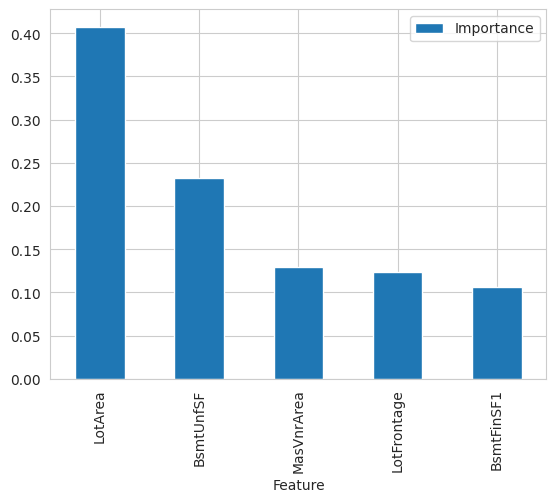

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline

sns.set_style('whitegrid')

# Apply pipeline transformation to X_train
transformed_array = Pipeline(best_pipeline.steps[:4]).transform(X_train)

# Extract selected features correctly
selected_mask = best_pipeline['feat_selection'].get_support()
selected_features = [col for col, keep in zip(X_train.columns, selected_mask) if keep]

# Create DataFrame with selected feature importance
df_feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': best_pipeline['model'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the most important features
print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

# Plot feature importance
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()


In [35]:
# Following code is from a SKlearn lesson from Code Institute
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train, X_test, y_test,pipeline):
	print("Model Evaluation \n")
	print("* Train Set")
	regression_evaluation(X_train,y_train,pipeline)
	print("* Test Set")
	regression_evaluation(X_test,y_test,pipeline)

def regression_evaluation(X,y,pipeline):
  prediction = pipeline.predict(X)
  print('R2 Score:', r2_score(y, prediction).round(3))  
  print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))  
  print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))  
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
  print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test,pipeline, alpha_scatter=0.5):
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)


  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].tick_params(axis='x', rotation=90)
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].tick_params(axis='x', rotation=90)
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")

plt.show()

Model Evaluation 

* Train Set
R2 Score: 0.998
Mean Absolute Error: 2031.201
Mean Squared Error: 10006565.89
Root Mean Squared Error: 3163.316


* Test Set
R2 Score: 0.864
Mean Absolute Error: 19491.898
Mean Squared Error: 939029175.811
Root Mean Squared Error: 30643.583




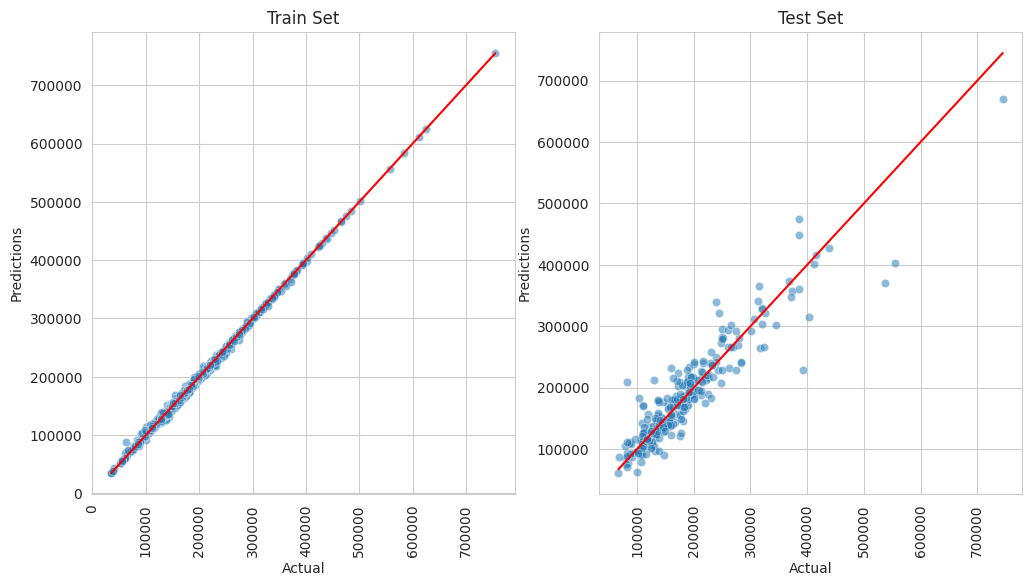

In [36]:
regression_performance(X_train, y_train, X_test, y_test,best_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_pipeline)
